### Necessary Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

### Defining Parameters

In [2]:
# NOMA parameters
P = 1
G1 = 10
G2 = 10
count = 1
R1_values = []
R2_values = []

### Plotting Noma adn OFDMA Graphs

/tmp/ipykernel_3659/364722612.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_3659/364722612.py:18: RuntimeWarning: invalid value encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)


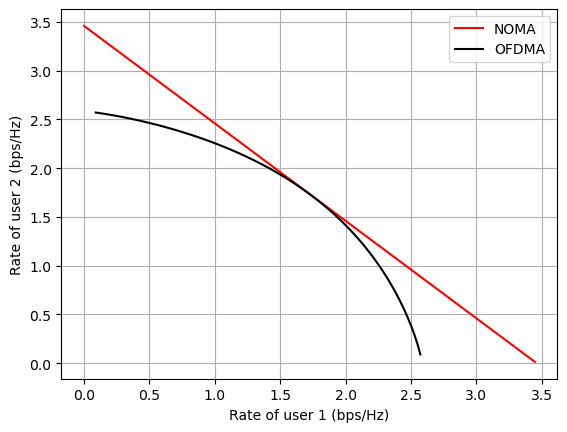

In [3]:

for alpha in np.arange(0, 1, 0.01):  # power splitting factor
    P1 = P * alpha
    P2 = P - P1
    R1 = np.log2(1 + P1 * G1)
    R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
    R1_values.append(R1)
    R2_values.append(R2)
    count += 1

plt.plot(R1_values, R2_values, 'r', label='NOMA')  # Add label for legend

count = 1
R1_values = []
R2_values = []
for alpha in np.arange(0, 1, 0.01):  # bandwidth splitting factor
    P1 = P / 2
    P2 = P / 2
    R1 = alpha * np.log2(1 + P1 * G1 / alpha)
    R2 = (1 - alpha) * np.log2(1 + P2 * G2 / (1 - alpha))
    R1_values.append(R1)
    R2_values.append(R2)
    count += 1

plt.plot(R1_values, R2_values, 'k', label='OFDMA')  # Add label for legend

plt.xlabel('Rate of user 1 (bps/Hz)')
plt.ylabel('Rate of user 2 (bps/Hz)')
plt.grid(True)  # Use True to enable grid
plt.legend()  # Show legend

plt.show()

### Plotting OFDMA Graph

### Spectral Efficiency Plots

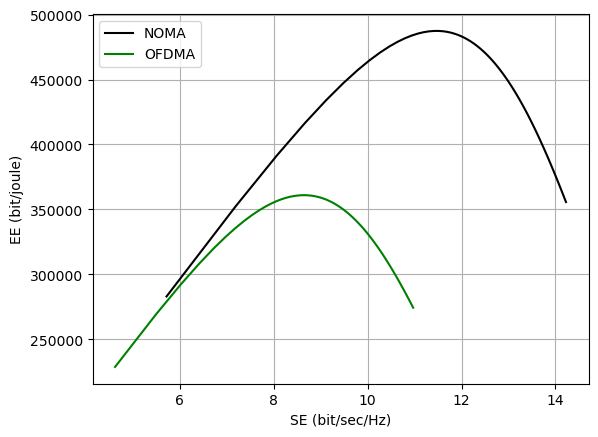

In [4]:

B = 5e6  # bandwidth Hz
N0 = 1e-21  # -150 dBw/Hz
N = N0 * B  # dBW
G1 = 1e-12  # -120 dB
G2 = 1e-14  # -140 dB
Pcircuit = 100  # watts

# NOMA
count = 1
SE = []
EE = []
for p in range(1, 101):  # W
    P1 = p * 0.1  # allocate less power to UE1
    P2 = p - P1
    R1 = B * np.log2(1 + P1 * G1 / N)
    R2 = B * np.log2(1 + P2 * G2 / (P1 * G2 + N))
    R = R1 + R2
    SE.append(R / B)  # bit/sec/Hz
    EE.append(R / (Pcircuit + p))  # b/joule
    count += 1

plt.plot(SE, EE, 'k')
plt.xlabel('SE (bit/sec/Hz)')
plt.ylabel('EE (bit/joule)')
plt.grid(True)

# OFDMA
count = 1
SE_line = []
EE_line = []
for p in range(1, 101):  # watts
    P1 = p / 2
    P2 = p / 2
    R1 = (B / 2) * np.log2(1 + P1 * G1 / (N0 * B / 2))
    R2 = (B / 2) * np.log2(1 + P2 * G2 / (N0 * B / 2))
    R = R1 + R2
    SE_line.append(R / B)  # bit/sec/Hz
    EE_line.append(R / (Pcircuit + p))  # bit/joule
    count += 1

plt.plot(SE_line, EE_line, 'g-')
plt.xlabel('SE (bit/sec/Hz)')
plt.ylabel('EE (bit/joule)')
plt.grid(True)
plt.legend(["NOMA", "OFDMA"])
plt.show()



### For More Number of Users

/tmp/ipykernel_3659/2435790173.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_3659/2435790173.py:48: RuntimeWarning: invalid value encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_3659/2435790173.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  R3 = alpha * np.log2(1 + P3 * G3 / alpha)
/tmp/ipykernel_3659/2435790173.py:50: RuntimeWarning: invalid value encountered in double_scalars
  R3 = alpha * np.log2(1 + P3 * G3 / alpha)


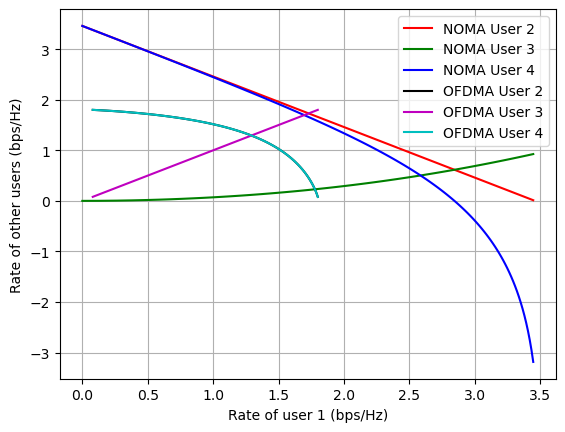

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# NOMA parameters
P = 1
G1 = 10
G2 = 10
G3 = 10
G4 = 10

# Initialize lists to store rate values
R1_values = []
R2_values = []
R3_values = []
R4_values = []

# Plotting NOMA graph
for alpha in np.arange(0, 1, 0.01):  # power splitting factor
    P1 = P * alpha
    P2 = P - P1
    P3 = P1 * alpha
    P4 = P2 - P3
    R1 = np.log2(1 + P1 * G1)
    R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
    R3 = np.log2(1 + P3 * G3 / (P1 * G3 + 1))
    R4 = np.log2(1 + P4 * G4 / (P1 * G4 + 1))
    R1_values.append(R1)
    R2_values.append(R2)
    R3_values.append(R3)
    R4_values.append(R4)

plt.plot(R1_values, R2_values, 'r', label='NOMA User 2')
plt.plot(R1_values, R3_values, 'g', label='NOMA User 3')
plt.plot(R1_values, R4_values, 'b', label='NOMA User 4')

# Reset the lists for OFDMA
R1_values = []
R2_values = []
R3_values = []
R4_values = []

# Plotting OFDMA
for alpha in np.arange(0, 1, 0.01):  # bandwidth splitting factor
    P1 = P / 4  # Equal power allocation to each user
    P2 = P / 4  # Equal power allocation to each user
    P3 = P / 4  # Equal power allocation to each user
    P4 = P / 4  # Equal power allocation to each user
    R1 = alpha * np.log2(1 + P1 * G1 / alpha)
    R2 = (1 - alpha) * np.log2(1 + P2 * G2 / (1 - alpha))
    R3 = alpha * np.log2(1 + P3 * G3 / alpha)
    R4 = (1 - alpha) * np.log2(1 + P4 * G4 / (1 - alpha))
    R1_values.append(R1)
    R2_values.append(R2)
    R3_values.append(R3)
    R4_values.append(R4)

plt.plot(R1_values, R2_values, 'k', label='OFDMA User 2')
plt.plot(R1_values, R3_values, 'm', label='OFDMA User 3')
plt.plot(R1_values, R4_values, 'c', label='OFDMA User 4')

plt.xlabel('Rate of user 1 (bps/Hz)')
plt.ylabel('Rate of other users (bps/Hz)')
plt.grid(True)
plt.legend()
plt.show()


/tmp/ipykernel_3659/3075290877.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_3659/3075290877.py:50: RuntimeWarning: invalid value encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_3659/3075290877.py:52: RuntimeWarning: divide by zero encountered in double_scalars
  R3 = alpha * np.log2(1 + P3 * G3 / alpha)
/tmp/ipykernel_3659/3075290877.py:52: RuntimeWarning: invalid value encountered in double_scalars
  R3 = alpha * np.log2(1 + P3 * G3 / alpha)


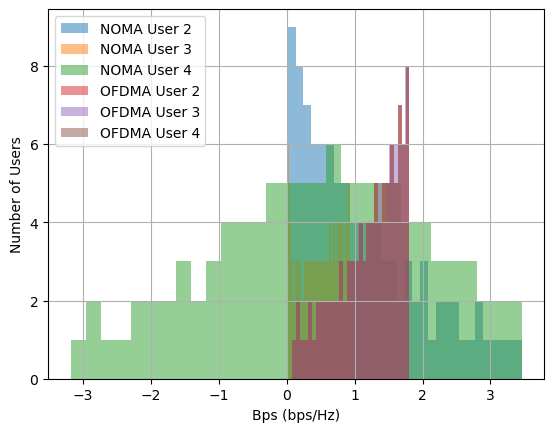

In [6]:
##USing Histograms:
import numpy as np
import matplotlib.pyplot as plt

# NOMA parameters
P = 1
G1 = 10
G2 = 10
G3 = 10
G4 = 10

# Initialize lists to store rate values
R1_values = []
R2_values = []
R3_values = []
R4_values = []

# Calculate rates for different power splitting factors
for alpha in np.arange(0, 1, 0.01):  # power splitting factor
    P1 = P * alpha
    P2 = P - P1
    P3 = P1 * alpha
    P4 = P2 - P3
    R1 = np.log2(1 + P1 * G1)
    R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
    R3 = np.log2(1 + P3 * G3 / (P1 * G3 + 1))
    R4 = np.log2(1 + P4 * G4 / (P1 * G4 + 1))
    R1_values.append(R1)
    R2_values.append(R2)
    R3_values.append(R3)
    R4_values.append(R4)

# Plot histograms for NOMA
plt.hist(R2_values, bins=30, alpha=0.5, label='NOMA User 2')
plt.hist(R3_values, bins=30, alpha=0.5, label='NOMA User 3')
plt.hist(R4_values, bins=30, alpha=0.5, label='NOMA User 4')

# Reset the lists for OFDMA
R1_values = []
R2_values = []
R3_values = []
R4_values = []

# Calculate rates for different bandwidth splitting factors
for alpha in np.arange(0, 1, 0.01):  # bandwidth splitting factor
    P1 = P / 4  # Equal power allocation to each user
    P2 = P / 4  # Equal power allocation to each user
    P3 = P / 4  # Equal power allocation to each user
    P4 = P / 4  # Equal power allocation to each user
    R1 = alpha * np.log2(1 + P1 * G1 / alpha)
    R2 = (1 - alpha) * np.log2(1 + P2 * G2 / (1 - alpha))
    R3 = alpha * np.log2(1 + P3 * G3 / alpha)
    R4 = (1 - alpha) * np.log2(1 + P4 * G4 / (1 - alpha))
    R1_values.append(R1)
    R2_values.append(R2)
    R3_values.append(R3)
    R4_values.append(R4)

# Plot histograms for OFDMA
plt.hist(R2_values, bins=30, alpha=0.5, label='OFDMA User 2')
plt.hist(R3_values, bins=30, alpha=0.5, label='OFDMA User 3')
plt.hist(R4_values, bins=30, alpha=0.5, label='OFDMA User 4')

plt.xlabel('Bps (bps/Hz)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.legend()
plt.show()


/tmp/ipykernel_3659/236293685.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_3659/236293685.py:44: RuntimeWarning: invalid value encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_3659/236293685.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  R3 = alpha * np.log2(1 + P3 * G3 / alpha)
/tmp/ipykernel_3659/236293685.py:46: RuntimeWarning: invalid value encountered in double_scalars
  R3 = alpha * np.log2(1 + P3 * G3 / alpha)


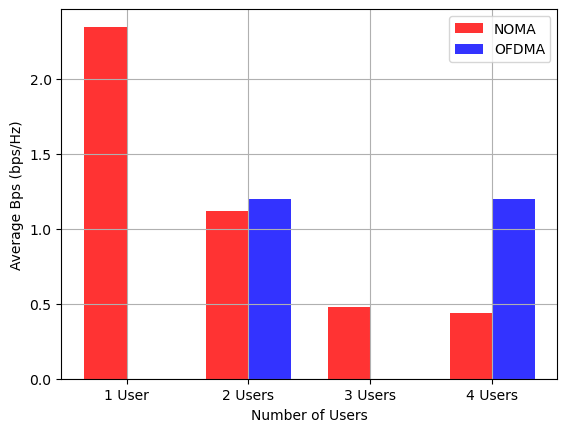

In [7]:
#using Bar Graphs:
import numpy as np
import matplotlib.pyplot as plt

# NOMA parameters
P = 1
G1 = 10
G2 = 10
G3 = 10
G4 = 10

# Initialize lists to store rate values
R1_values = []
R2_values = []
R3_values = []
R4_values = []

# Calculate rates for different power splitting factors (NOMA)
for alpha in np.arange(0, 1, 0.01):  # power splitting factor
    P1 = P * alpha
    P2 = P - P1
    P3 = P1 * alpha
    P4 = P2 - P3
    R1 = np.log2(1 + P1 * G1)
    R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
    R3 = np.log2(1 + P3 * G3 / (P1 * G3 + 1))
    R4 = np.log2(1 + P4 * G4 / (P1 * G4 + 1))
    R1_values.append(R1)
    R2_values.append(R2)
    R3_values.append(R3)
    R4_values.append(R4)

# Calculate rates for different bandwidth splitting factors (OFDMA)
R1_values_ofdma = []
R2_values_ofdma = []
R3_values_ofdma = []
R4_values_ofdma = []

for alpha in np.arange(0, 1, 0.01):  # bandwidth splitting factor
    P1 = P / 4  # Equal power allocation to each user
    P2 = P / 4  # Equal power allocation to each user
    P3 = P / 4  # Equal power allocation to each user
    P4 = P / 4  # Equal power allocation to each user
    R1 = alpha * np.log2(1 + P1 * G1 / alpha)
    R2 = (1 - alpha) * np.log2(1 + P2 * G2 / (1 - alpha))
    R3 = alpha * np.log2(1 + P3 * G3 / alpha)
    R4 = (1 - alpha) * np.log2(1 + P4 * G4 / (1 - alpha))
    R1_values_ofdma.append(R1)
    R2_values_ofdma.append(R2)
    R3_values_ofdma.append(R3)
    R4_values_ofdma.append(R4)

# Create x-axis labels
x_labels = ['1 User', '2 Users', '3 Users', '4 Users']

# Calculate average Bps values for each user count (NOMA)
average_bps_noma = [
    np.mean(R1_values),
    np.mean(R2_values),
    np.mean(R3_values),
    np.mean(R4_values)
]

# Calculate average Bps values for each user count (OFDMA)
average_bps_ofdma = [
    np.mean(R1_values_ofdma),
    np.mean(R2_values_ofdma),
    np.mean(R3_values_ofdma),
    np.mean(R4_values_ofdma)
]

# Plot bar graphs
bar_width = 0.35
opacity = 0.8
index = np.arange(len(x_labels))

plt.bar(index, average_bps_noma, bar_width, alpha=opacity, color='r', label='NOMA')
plt.bar(index + bar_width, average_bps_ofdma, bar_width,alpha=opacity, color='b', label='OFDMA')

plt.xlabel('Number of Users')
plt.ylabel('Average Bps (bps/Hz)')
plt.xticks(index + bar_width / 2, x_labels)
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_3659/268948229.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_3659/268948229.py:45: RuntimeWarning: invalid value encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_3659/268948229.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  R3 = alpha * np.log2(1 + P3 * G3 / alpha)
/tmp/ipykernel_3659/268948229.py:47: RuntimeWarning: invalid value encountered in double_scalars
  R3 = alpha * np.log2(1 + P3 * G3 / alpha)


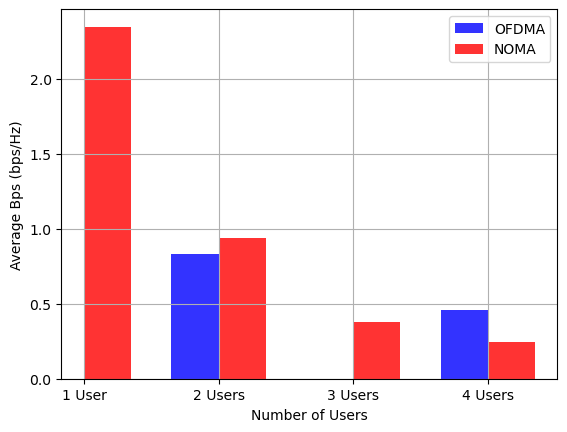

In [8]:
# for different channel gains:
#for different value of gains:
import numpy as np
import matplotlib.pyplot as plt

# NOMA parameters
P = 1
G1 = 10
G2 = 5
G3 = 3
G4 = 2

# Initialize lists to store rate values
R1_values = []
R2_values = []
R3_values = []
R4_values = []

# Calculate rates for different power splitting factors (NOMA)
for alpha in np.arange(0, 1, 0.01):  # power splitting factor
    P1 = P * alpha
    P2 = P - P1
    P3 = P1 * alpha
    P4 = P2 - P3
    R1 = np.log2(1 + P1 * G1)
    R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
    R3 = np.log2(1 + P3 * G3 / (P1 * G3 + 1))
    R4 = np.log2(1 + P4 * G4 / (P1 * G4 + 1))
    R1_values.append(R1)
    R2_values.append(R2)
    R3_values.append(R3)
    R4_values.append(R4)

# Calculate rates for different bandwidth splitting factors (OFDMA)
R1_values_ofdma = []
R2_values_ofdma = []
R3_values_ofdma = []
R4_values_ofdma = []

for alpha in np.arange(0, 1, 0.01):  # bandwidth splitting factor
    P1 = P / 4  # Equal power allocation to each user
    P2 = P / 4  # Equal power allocation to each user
    P3 = P / 4  # Equal power allocation to each user
    P4 = P / 4  # Equal power allocation to each user
    R1 = alpha * np.log2(1 + P1 * G1 / alpha)
    R2 = (1 - alpha) * np.log2(1 + P2 * G2 / (1 - alpha))
    R3 = alpha * np.log2(1 + P3 * G3 / alpha)
    R4 = (1 - alpha) * np.log2(1 + P4 * G4 / (1 - alpha))
    R1_values_ofdma.append(R1)
    R2_values_ofdma.append(R2)
    R3_values_ofdma.append(R3)
    R4_values_ofdma.append(R4)

# Create x-axis labels
x_labels = ['1 User', '2 Users', '3 Users', '4 Users']

# Calculate average Bps values for each user count (NOMA)
average_bps_noma = [
    np.mean(R1_values),
    np.mean(R2_values),
    np.mean(R3_values),
    np.mean(R4_values)
]

# Calculate average Bps values for each user count (OFDMA)
average_bps_ofdma = [
    np.mean(R1_values_ofdma),
    np.mean(R2_values_ofdma),
    np.mean(R3_values_ofdma),
    np.mean(R4_values_ofdma)
]

# Plot bar graphs
bar_width = 0.35
opacity = 0.8
index = np.arange(len(x_labels))

plt.bar(index, average_bps_ofdma,bar_width, alpha=opacity, color='b', label='OFDMA')
plt.bar(index + bar_width, average_bps_noma, bar_width, alpha=opacity, color='r', label='NOMA')

plt.xlabel('Number of Users')
plt.ylabel('Average Bps (bps/Hz)')
plt.xticks(index + bar_width / 2, x_labels)
plt.legend()
plt.grid(True)
plt.show()


In [9]:
#Exhaustive technique for 2 users NOMA optimal power allocation:
import numpy as np

# NOMA parameters
P = 1
G1 = 10
G2 = 10

max_sum_rate = 0  # Initialize maximum sum rate
optimal_P1 = 0  # Initialize optimal P1
optimal_P2 = 0  # Initialize optimal P2

# Loop to calculate the sum rate for different power combinations
for P1 in np.arange(0, P + 0.01, 0.01):
    P2 = P - P1
    R1 = np.log2(1 + P1 * G1)
    R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
    sum_rate = R1 + R2
    if sum_rate > max_sum_rate:
        max_sum_rate = sum_rate
        optimal_P1 = P1
        optimal_P2 = P2

# Print the matrix of power values and the optimal combination
print(f"P1: {optimal_P1}")
print(f"P2: {optimal_P2}")
print(f"Max Sum Rate: {max_sum_rate}")


P1: 0.44
P2: 0.56
Max Sum Rate: 3.4594316186372978


In [10]:
# same exhaustie technique for four users:
import numpy as np

# NOMA parameters
P = 1
G1 = 10
G2 = 10
G3 = 10
G4 = 10

max_sum_rate = 0  # Initialize maximum sum rate
optimal_P1 = 0  # Initialize optimal P1
optimal_P2 = 0  # Initialize optimal P2
optimal_P3 = 0  # Initialize optimal P3
optimal_P4 = 0  # Initialize optimal P4

# Loop to calculate the sum rate for different power combinations
for P1 in np.arange(0, P + 0.01, 0.01):
    for P2 in np.arange(0, P - P1 + 0.01, 0.01):
        for P3 in np.arange(0, P - P1 - P2 + 0.01, 0.01):
            P4 = P - P1 - P2 - P3
            R1 = np.log2(1 + P1 * G1)
            R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
            R3 = np.log2(1 + P3 * G3 / (P1 * G3 + 1))
            R4 = np.log2(1 + P4 * G4 / (P1 * G4 + 1))
            sum_rate = R1 + R2 + R3 + R4
            if sum_rate > max_sum_rate:
                max_sum_rate = sum_rate
                optimal_P1 = P1
                optimal_P2 = P2
                optimal_P3 = P3
                optimal_P4 = P4

# Print the matrix of power values and the optimal combination
print(f"P1: {optimal_P1}")
print(f"P2: {optimal_P2}")
print(f"P3: {optimal_P3}")
print(f"P4: {optimal_P4}")
print(f"Max Sum Rate: {max_sum_rate}")


P1: 0.0
P2: 0.33
P3: 0.34
P4: 0.3299999999999999
Max Sum Rate: 6.346176843379406


In [11]:
import numpy as np

# NOMA parameters
P = 1
G1 = 10
G2 = 10
G3 = 10
G4 = 10

max_sum_rate = 0  # Initialize maximum sum rate
optimal_P1 = 0  # Initialize optimal P1
optimal_P2 = 0  # Initialize optimal P2
optimal_P3 = 0  # Initialize optimal P3
optimal_P4 = 0  # Initialize optimal P4

# Initialize power matrix
power_matrix = np.zeros((101, 101, 101))

# Loop to calculate the sum rate for different power combinations
for P1 in np.arange(0, P , 0.01):
    for P2 in np.arange(0, P - P1 , 0.01):
        for P3 in np.arange(0, P - P1 - P2 , 0.01):
            P4 = P - P1 - P2 - P3
            R1 = np.log2(1 + P1 * G1)
            R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
            R3 = np.log2(1 + P3 * G3 / (P1 * G3 + 1))
            R4 = np.log2(1 + P4 * G4 / (P1 * G4 + 1))
            sum_rate = R1 + R2 + R3 + R4
            if sum_rate > max_sum_rate:
                max_sum_rate = sum_rate
                optimal_P1 = P1
                optimal_P2 = P2
                optimal_P3 = P3
                optimal_P4 = P4

            # Store power values in the power matrix
            power_matrix[int(P1 * 100), int(P2 * 100), int(P3 * 100)] = P4

# Print the power matrix, optimal combination, and maximum sum rate
print("Power Matrix:")
print(power_matrix)
print(f"\nOptimal Power Values:")
print(f"P1: {optimal_P1}")
print(f"P2: {optimal_P2}")
print(f"P3: {optimal_P3}")
print(f"P4: {optimal_P4}")
print(f"\nMax Sum Rate: {max_sum_rate}")


Power Matrix:
[[[1.00000000e+00 9.90000000e-01 9.80000000e-01 ... 2.00000000e-02
   1.00000000e-02 0.00000000e+00]
  [9.90000000e-01 9.80000000e-01 9.70000000e-01 ... 1.00000000e-02
   0.00000000e+00 0.00000000e+00]
  [9.80000000e-01 9.70000000e-01 9.60000000e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [2.00000000e-02 1.00000000e-02 1.73472348e-17 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.00000000e-02 8.67361738e-18 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[9.90000000e-01 9.80000000e-01 9.70000000e-01 ... 1.00000000e-02
   0.00000000e+00 0.00000000e+00]
  [9.80000000e-01 9.70000000e-01 9.60000000e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.70000000e-01 9.60000000e-01 9.50000000e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [1.00000000e-02 8.67361738e-18 0.00000000e+00 ... 0.00000000e

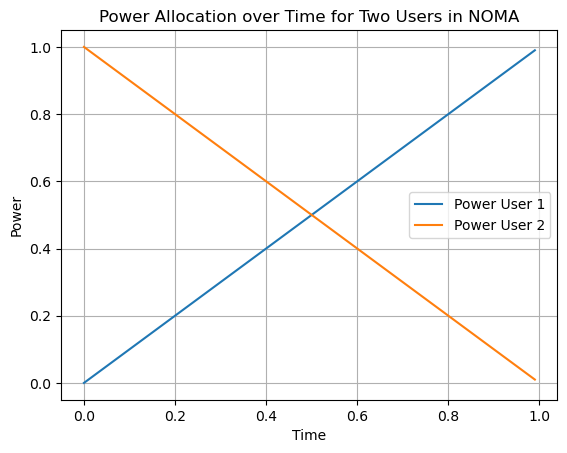

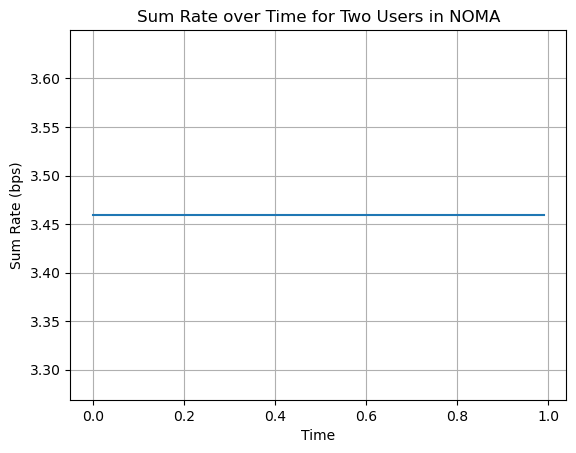

In [12]:
#power allocation over time for 2 users
import numpy as np
import matplotlib.pyplot as plt

# NOMA parameters
P = 1
G1 = 10
G2 = 10

# Initialize power values and sum rates over time
power1_over_time = []
power2_over_time = []
sum_rate_over_time = []

# Loop to iterate and calculate power allocation over time
for t in np.arange(0, 1, 0.01):
    P1 = P * t
    P2 = P - P1
    R1 = np.log2(1 + P1 * G1)
    R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
    sum_rate = R1 + R2
    
    # Store power and sum rate values
    power1_over_time.append(P1)
    power2_over_time.append(P2)
    sum_rate_over_time.append(sum_rate)

# Plot power allocation over time
plt.plot(np.arange(0, 1, 0.01), power1_over_time, label='Power User 1')
plt.plot(np.arange(0, 1, 0.01), power2_over_time, label='Power User 2')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Allocation over Time for Two Users in NOMA')
plt.legend()
plt.grid(True)
plt.show()

# Plot sum rate over time
plt.plot(np.arange(0, 1, 0.01), sum_rate_over_time)
plt.xlabel('Time')
plt.ylabel('Sum Rate (bps)')
plt.title('Sum Rate over Time for Two Users in NOMA')
plt.grid(True)
plt.show()


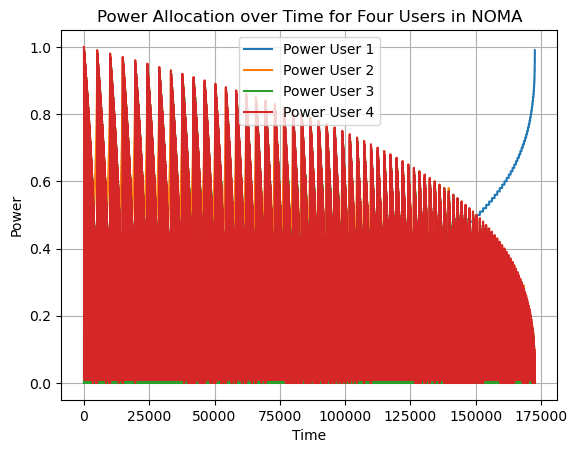

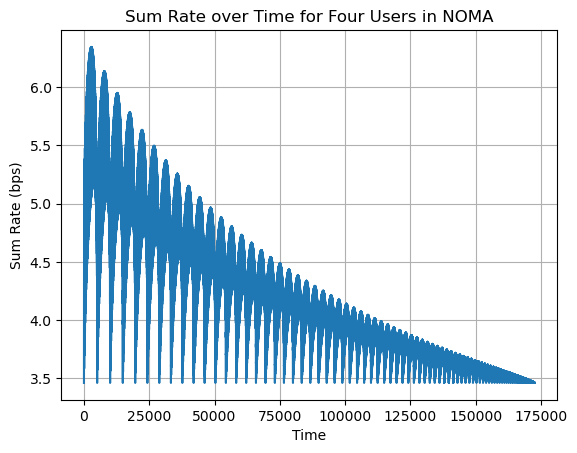

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# NOMA parameters
P = 1
G1 = 10
G2 = 10
G3 = 10
G4 = 10

# Initialize power values and sum rates over time
power1_over_time = []
power2_over_time = []
power3_over_time = []
power4_over_time = []
sum_rate_over_time = []

# Loop to iterate and calculate power allocation over time
for t in np.arange(0, 1, 0.01):
    P1 = P * t
    for t2 in np.arange(0, 1 - t, 0.01):
        P2 = P * t2
        for t3 in np.arange(0, 1 - t - t2, 0.01):
            P3 = P * t3
            P4 = P - P1 - P2 - P3
            R1 = np.log2(1 + P1 * G1)
            R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
            R3 = np.log2(1 + P3 * G3 / (P1 * G3 + 1))
            R4 = np.log2(1 + P4 * G4 / (P1 * G4 + 1))
            sum_rate = R1 + R2 + R3 + R4

            # Store power values and sum rate
            power1_over_time.append(P1)
            power2_over_time.append(P2)
            power3_over_time.append(P3)
            power4_over_time.append(P4)
            sum_rate_over_time.append(sum_rate)

# Plot power allocation over time
time = np.arange(0, len(power1_over_time), 1)
plt.plot(time, power1_over_time, label='Power User 1')
plt.plot(time, power2_over_time, label='Power User 2')
plt.plot(time, power3_over_time, label='Power User 3')
plt.plot(time, power4_over_time, label='Power User 4')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Allocation over Time for Four Users in NOMA')
plt.legend()
plt.grid(True)
plt.show()

# Plot sum rate over time
plt.plot(np.arange(0, len(sum_rate_over_time), 1), sum_rate_over_time)
plt.xlabel('Time')
plt.ylabel('Sum Rate (bps)')
plt.title('Sum Rate over Time for Four Users in NOMA')
plt.grid(True)
plt.show()


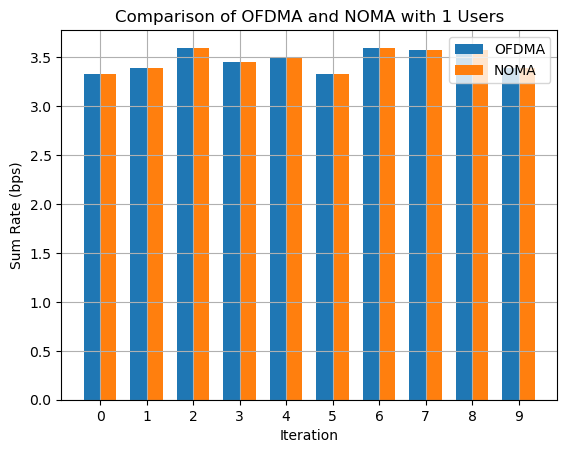

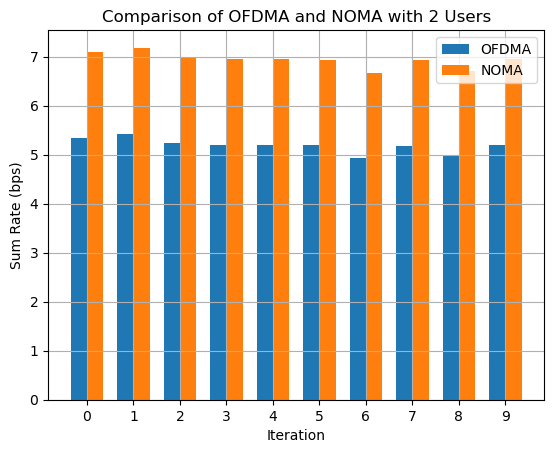

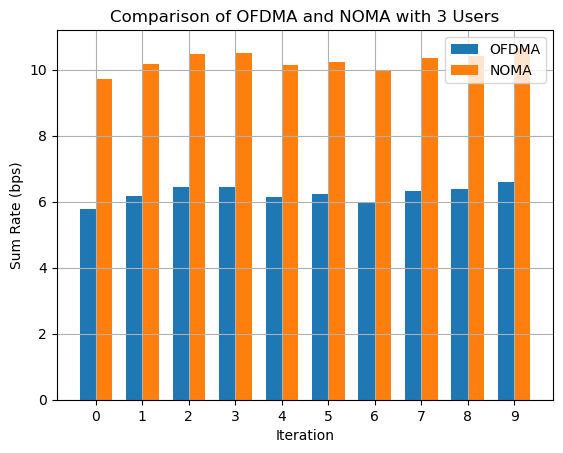

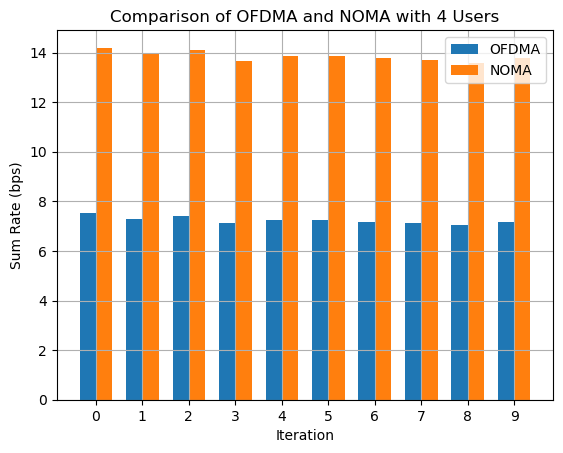

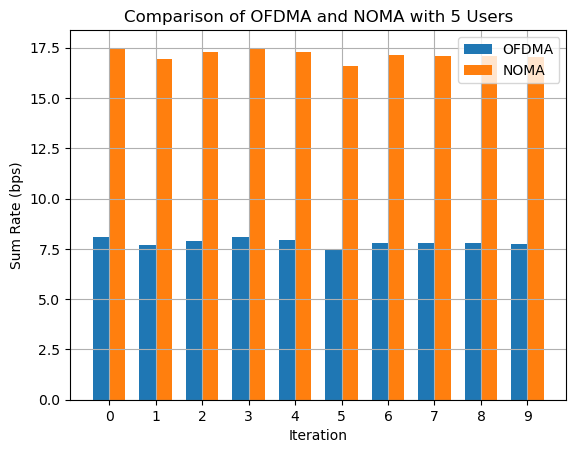

In [14]:
#channel variation along with optimal power allocation NOMA outperforms OFDMA
import numpy as np
import matplotlib.pyplot as plt

# Parameters
P = 1
num_iterations = 10
num_users_list = [1, 2, 3, 4, 5]

for num_users in num_users_list:
    # Initialize sum rate arrays
    sum_rate_ofdma = np.zeros(num_iterations)
    sum_rate_noma = np.zeros(num_iterations)

    for i in range(num_iterations):
        # Generate random channel gains with Gaussian distribution
        channel_gains = np.random.normal(10, 1, num_users)

        # OFDMA
        P_ofdma = P / num_users
        sum_rate_ofdma[i] = np.sum(np.log2(1 + P_ofdma * channel_gains))

        # NOMA
        best_sum_rate_noma = 0
        best_power_allocation = []

        for j in range(2**num_users - 1):
            binary_allocation = np.binary_repr(j+1).zfill(num_users)
            power_allocation = []
            for b, g in zip(binary_allocation, channel_gains):
                if b == '1':
                    power_allocation.append(P)
                else:
                    power_allocation.append(0)
            rates = np.log2(1 + np.array(power_allocation) * channel_gains)
            sum_rate = np.sum(rates)
            if sum_rate > best_sum_rate_noma:
                best_sum_rate_noma = sum_rate
                best_power_allocation = power_allocation

        sum_rate_noma[i] = best_sum_rate_noma

    # Plot bar graph for current number of users
    plt.figure()
    bar_width = 0.35
    index = np.arange(num_iterations)

    plt.bar(index, sum_rate_ofdma, bar_width, label='OFDMA')
    plt.bar(index + bar_width, sum_rate_noma, bar_width, label='NOMA')

    plt.xlabel('Iteration')
    plt.ylabel('Sum Rate (bps)')
    plt.title(f'Comparison of OFDMA and NOMA with {num_users} Users')
    plt.xticks(index + bar_width / 2, range(num_iterations))
    plt.legend()
    plt.grid(True)
    plt.show()
